In [140]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

from skimage.data import imread
from skimage.io import imshow
from skimage.feature import corner_harris, corner_peaks

from scipy.signal import gaussian
from scipy.signal import convolve2d

In [299]:
# Constants :
kappa = 0.05
sigma_d = 1
sigma_i = 2

# Theoritical results

   ## chesboard

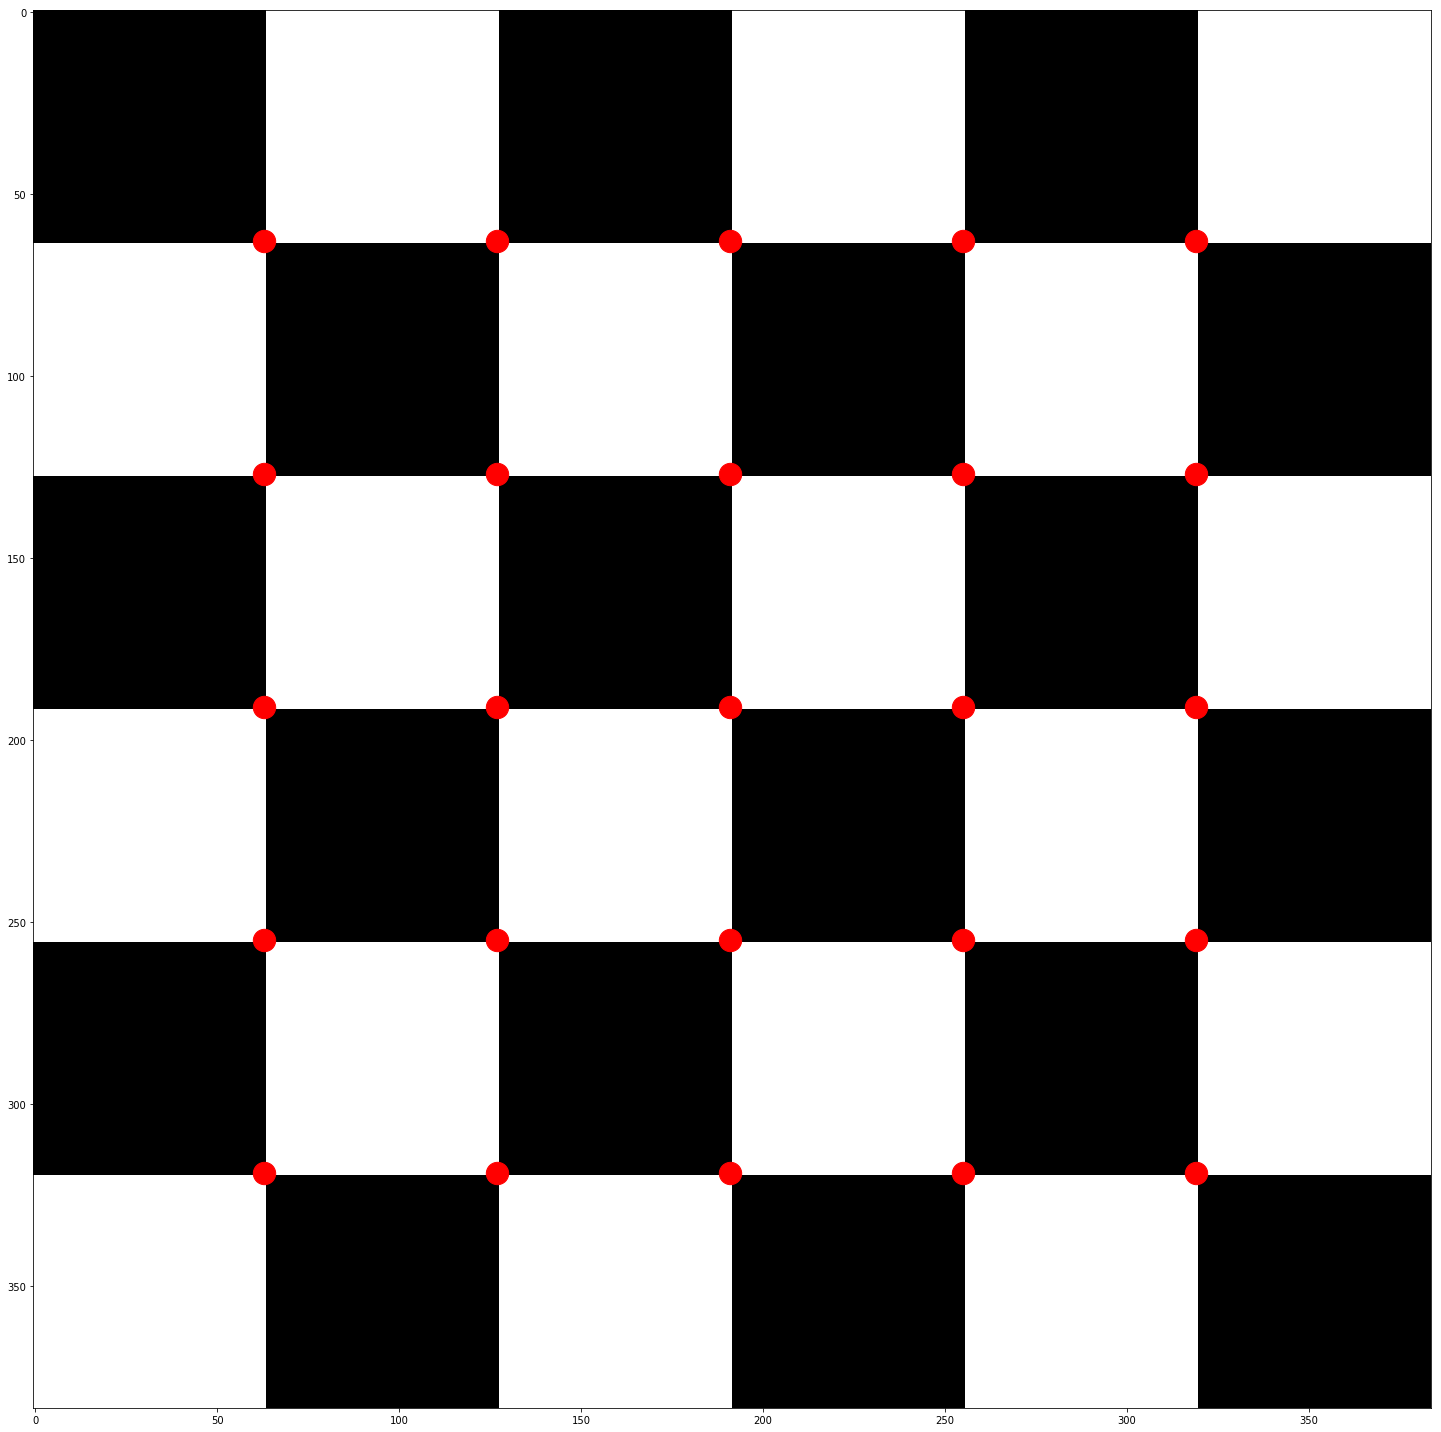

In [169]:
chessboard = imread('images/checkerboard.png')
chess_th = corner_peaks(corner_harris(chessboard), min_distance = 5);
plt.figure(figsize = (20, 20));
plt.scatter(chess_th[:, 0], chess_th[:, 1], color = 'r', marker= ".", s = 2000);
imshow(chessboard);

## bouc.pgm

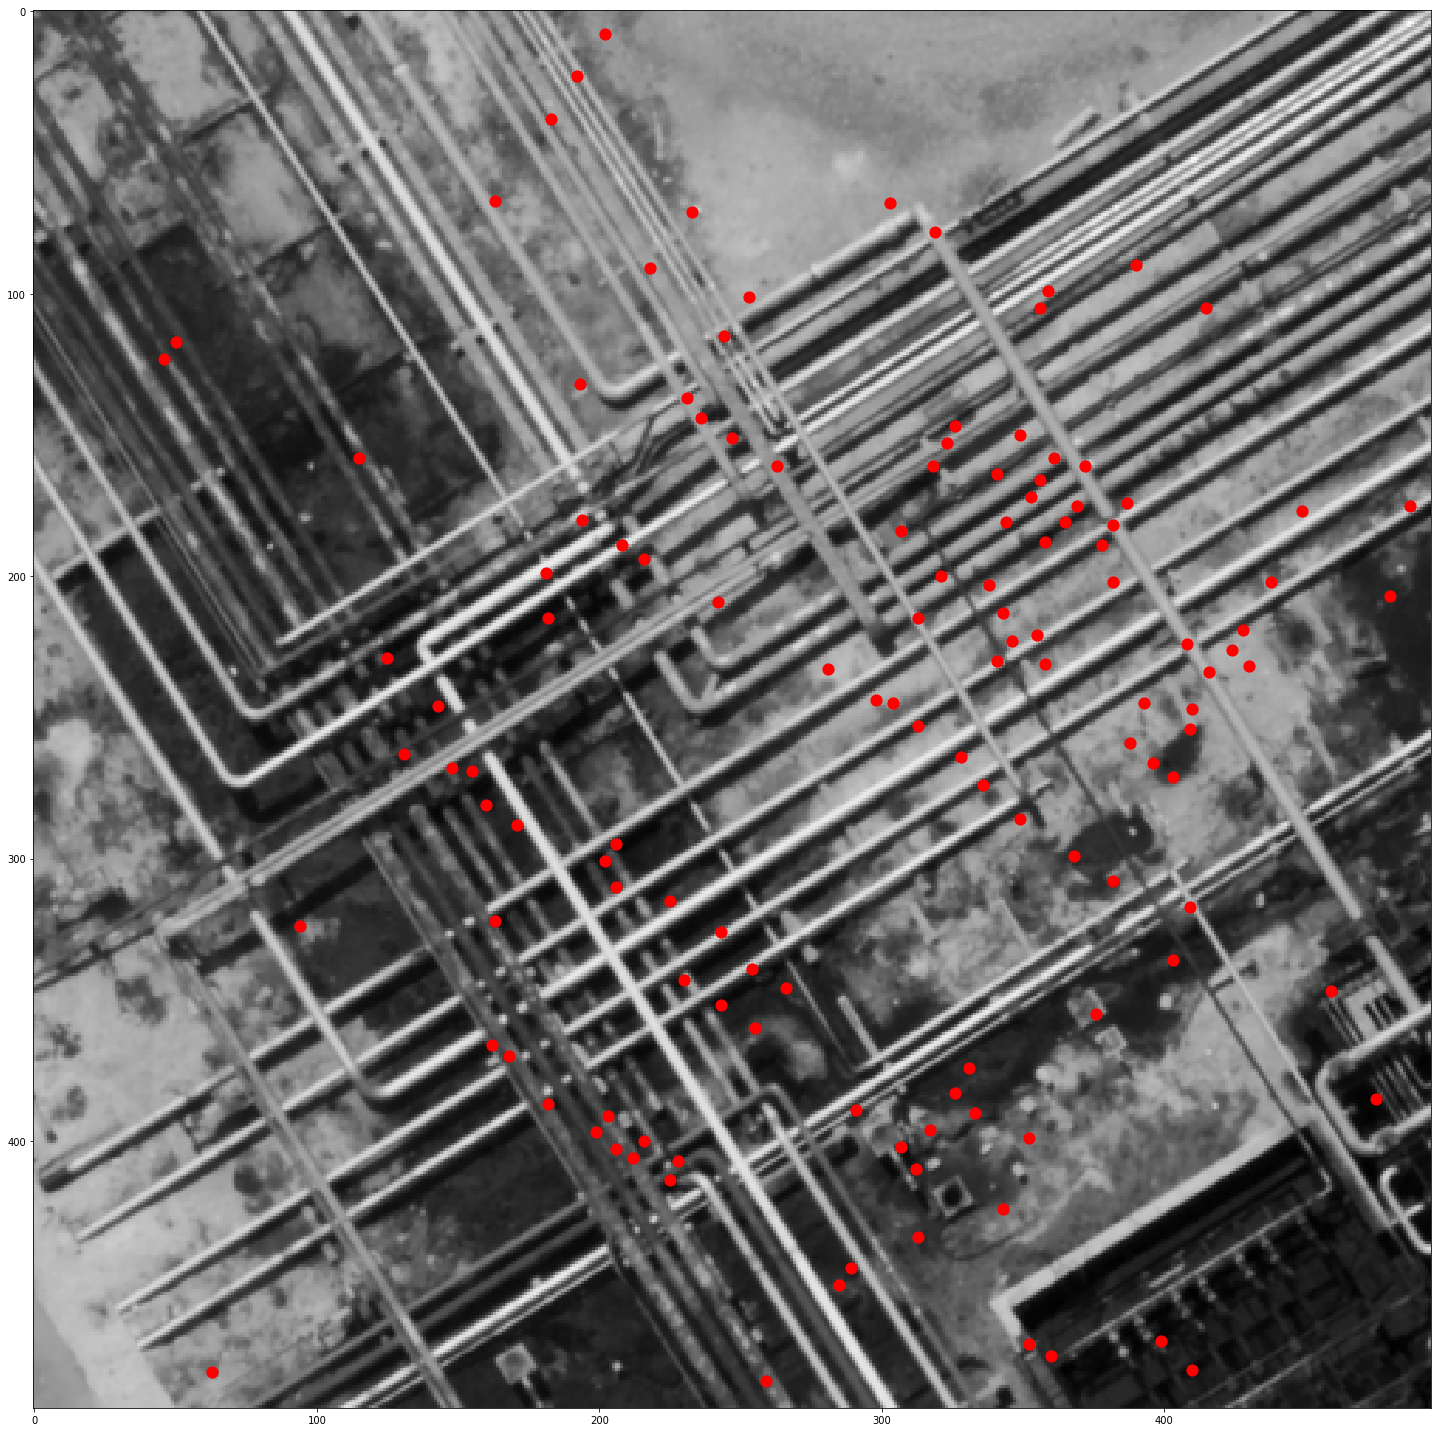

In [339]:
bouc = imread('images/bouc.pgm')
theorical = corner_peaks(corner_harris(bouc), min_distance = 5);
plt.figure(figsize = (20, 20));
plt.scatter(theorical[:, 0], theorical[:, 1], color = 'r', marker= ".", s = 500);
imshow(bouc);

# Practical session

In [186]:
theorical.shape

(130, 2)

In [340]:
# bouc = chessboard

In [341]:
# Size of image
bouc.shape

(495, 495)

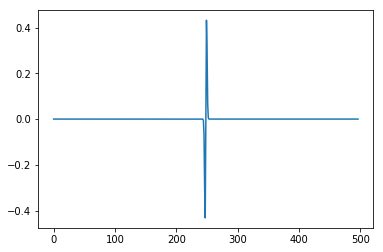

In [342]:
dx = [-0.5, 0, 0.5]

G = np.convolve(gaussian(bouc.shape[0], std = sigma_d), dx);
plt.plot(G);

In [343]:
Gx = G.reshape(1, -1)
Gy = Gx.T
Gxy = Gy.dot(Gx)

print ("Shape of Gx : {} and Gy : {}".format(Gx.shape, Gy.shape))

Shape of Gx : (1, 497) and Gy : (497, 1)


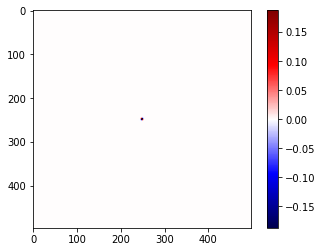

In [344]:
plt.imshow(Gxy, cmap = 'seismic');
plt.colorbar();

In [345]:
Ix = convolve2d(bouc, Gx, mode = 'same')
Iy = convolve2d(bouc, Gy, mode = 'same')

In [346]:
print ("Shape of Ix : {} and Iy : {}".format(Ix.shape, Iy.shape))

Shape of Ix : (495, 495) and Iy : (495, 495)


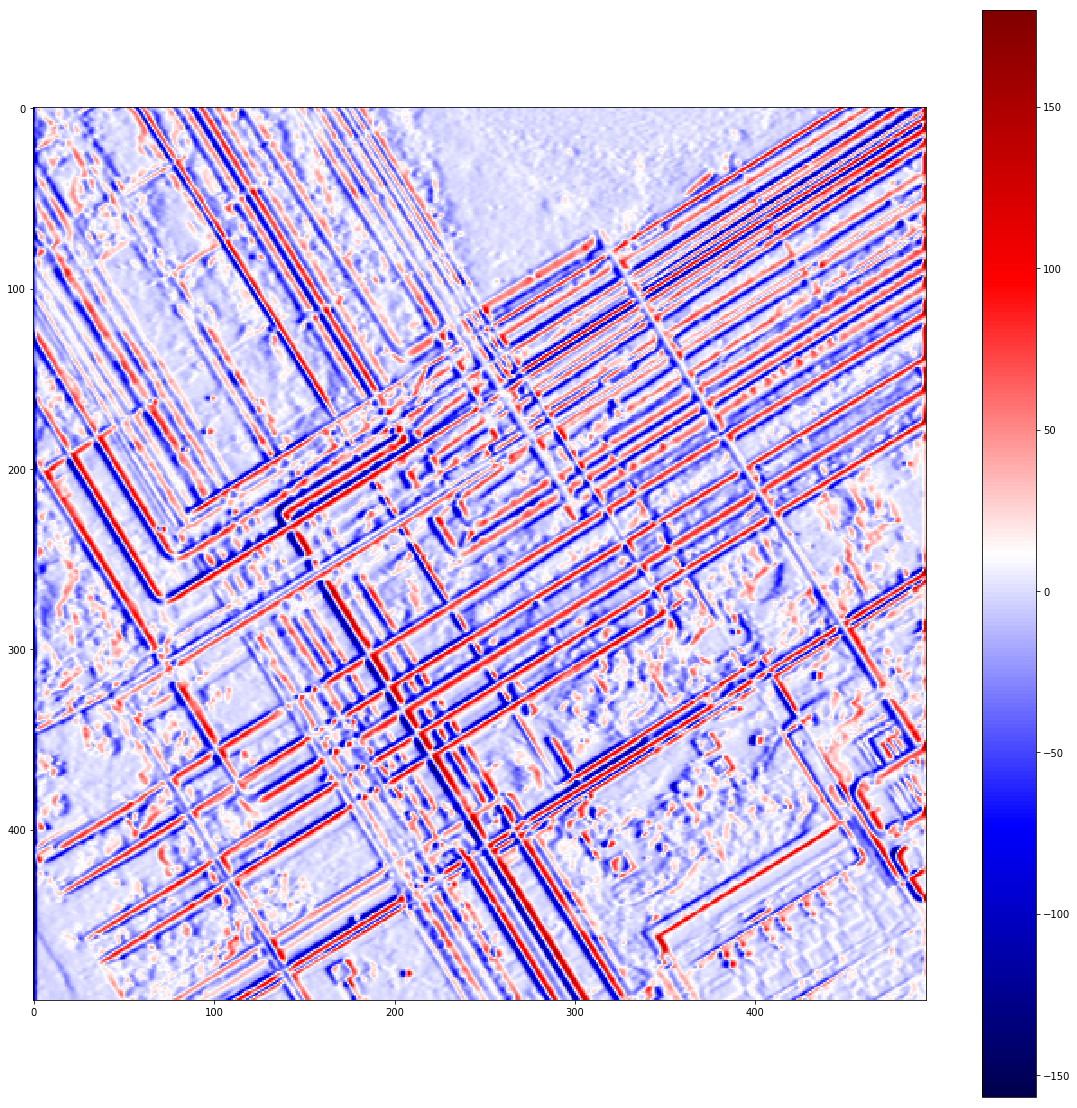

In [378]:
plt.figure(figsize = (20, 20));
plt.imshow(Ix, cmap = "seismic"); plt.colorbar();

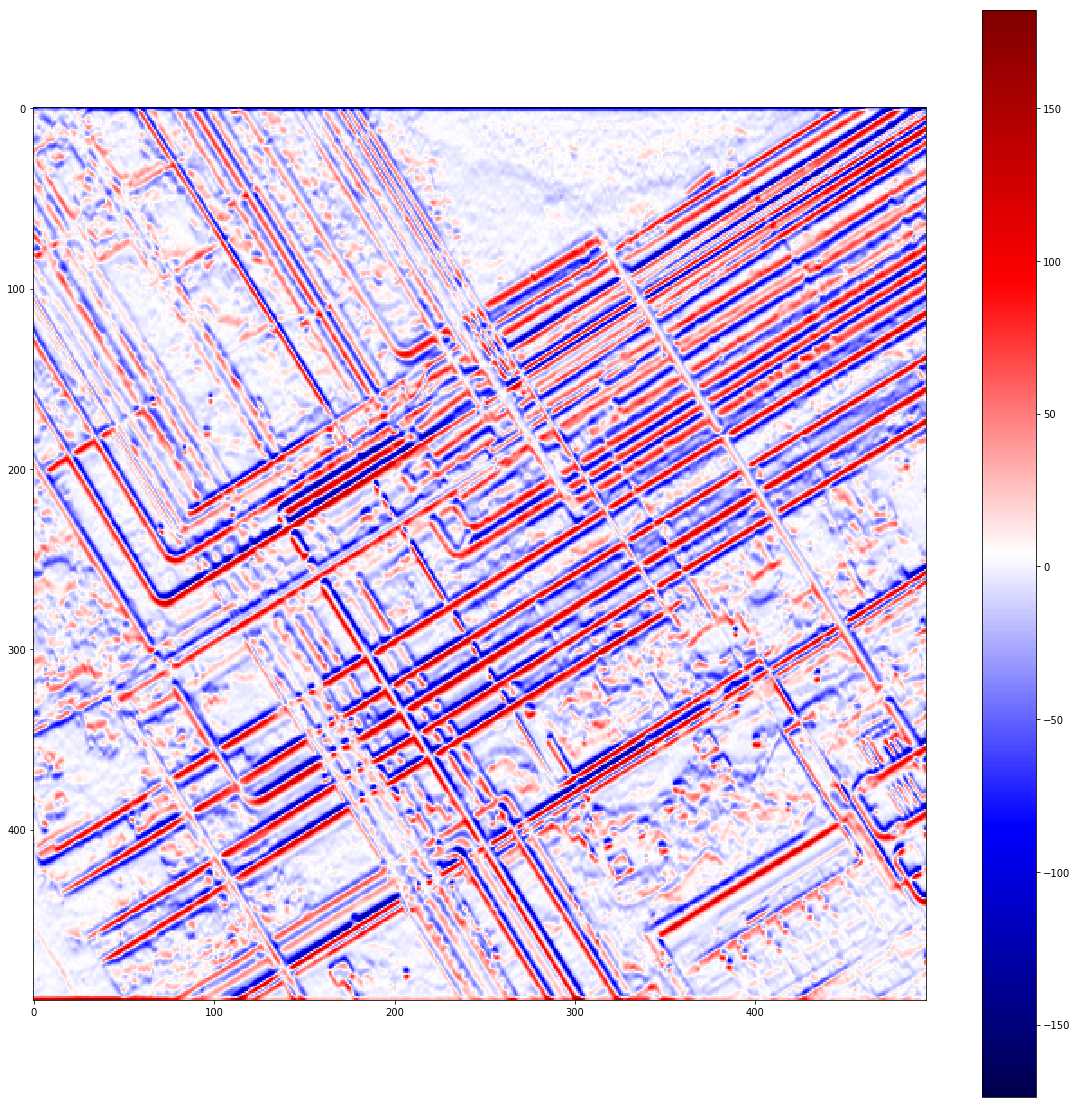

In [377]:
plt.figure(figsize = (20, 20));
plt.imshow(Iy, cmap = "seismic"); plt.colorbar();

# Product images

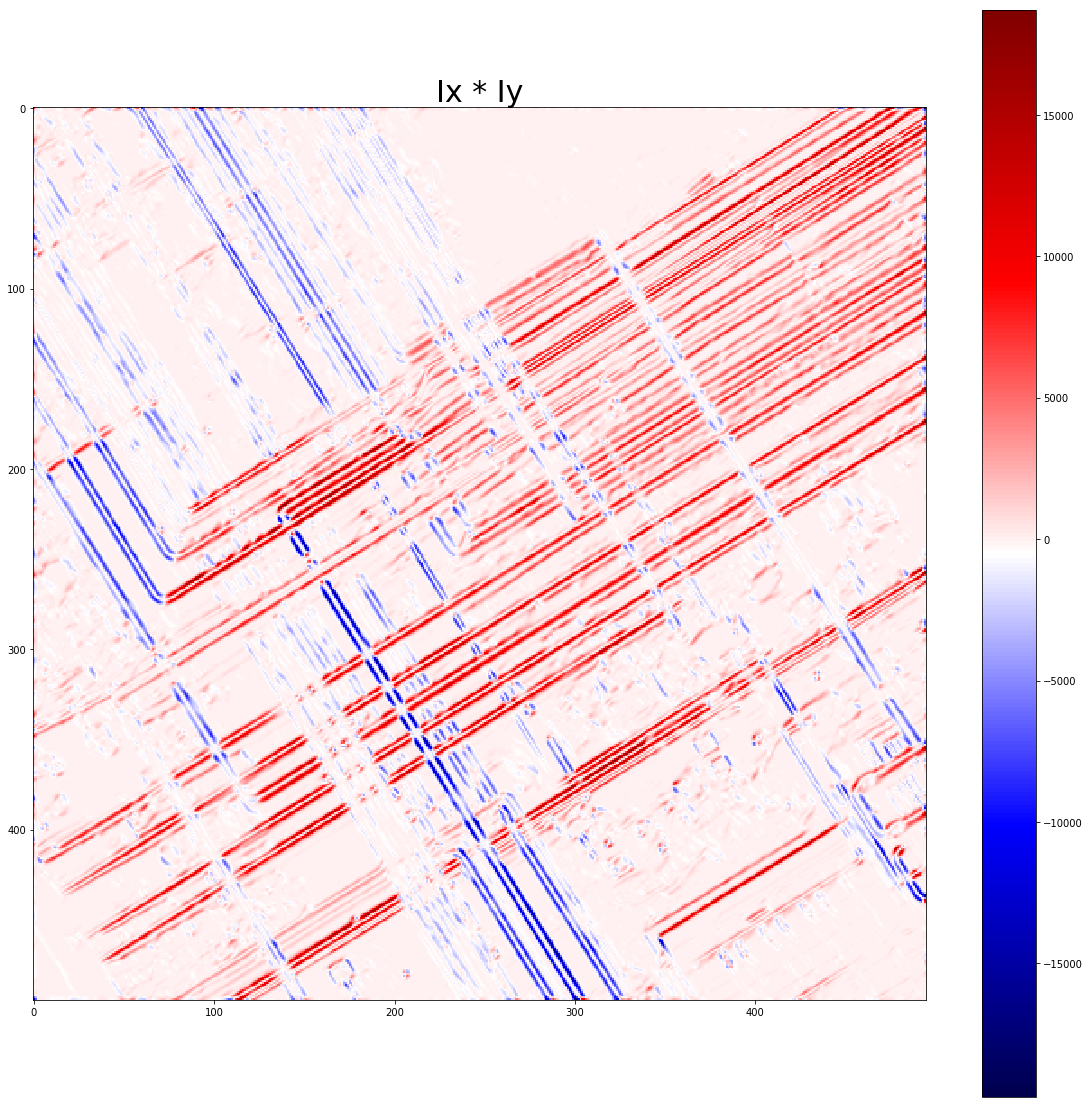

In [385]:
plt.figure(figsize = (20, 20));
plt.imshow(Ix * Iy, cmap = "seismic"); plt.colorbar();
plt.title("Ix * Iy", fontsize = 30);

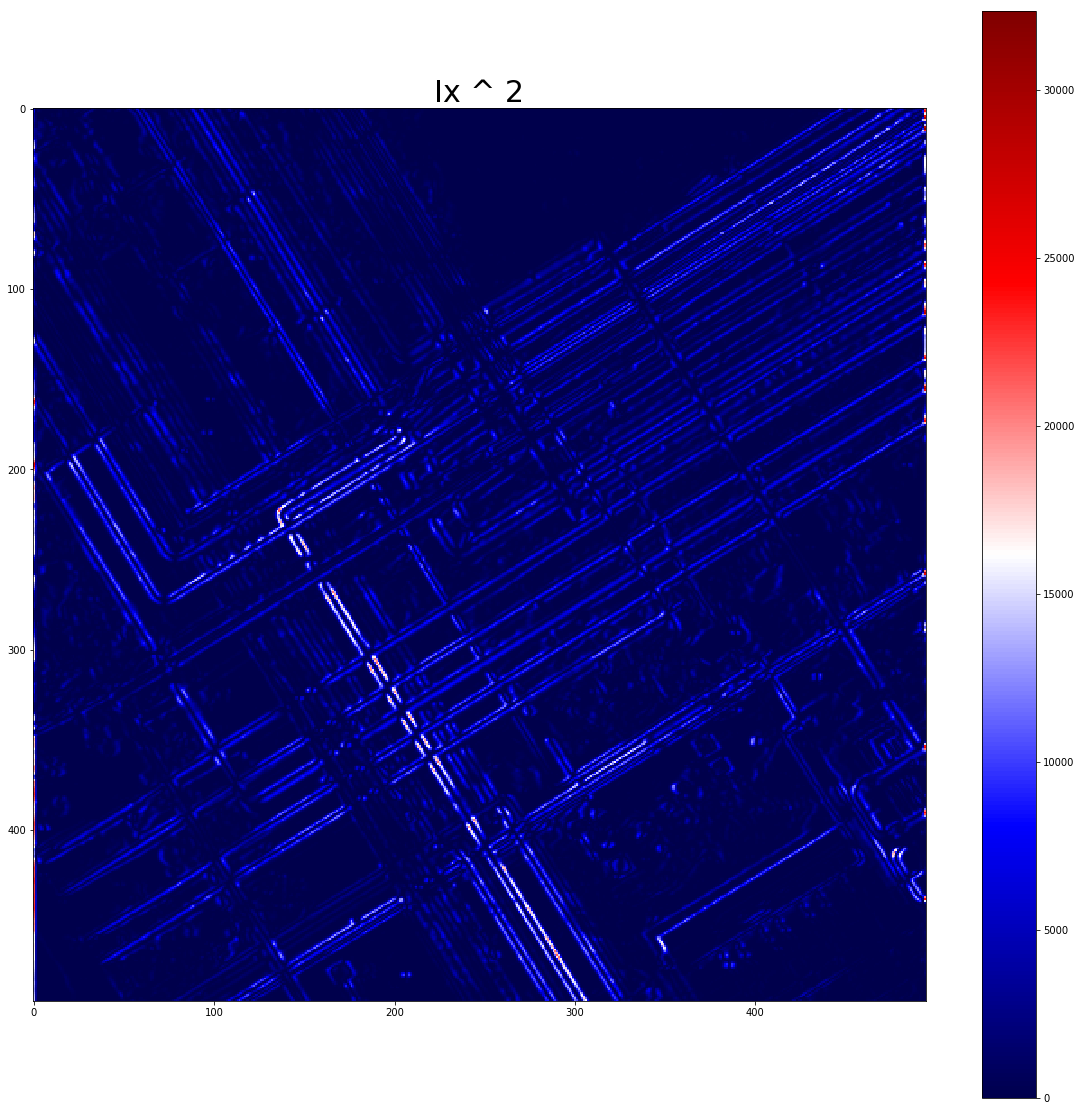

In [386]:
plt.figure(figsize = (20, 20));
plt.imshow(Ix ** 2, cmap = "seismic"); plt.colorbar();
plt.title("Ix ^ 2", fontsize = 30);

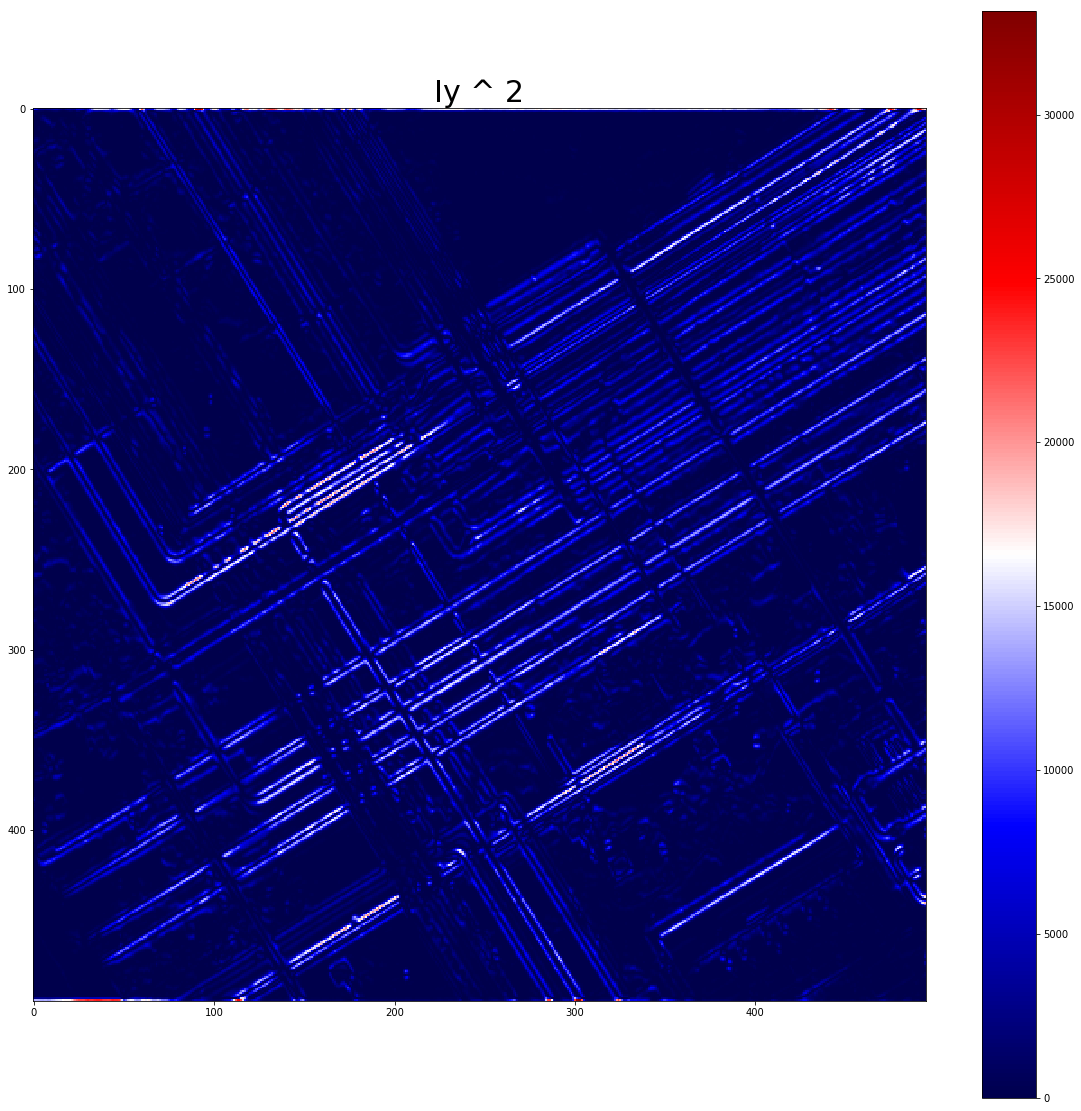

In [387]:
plt.figure(figsize = (20, 20));
plt.imshow(Iy ** 2, cmap = "seismic"); plt.colorbar();
plt.title("Iy ^ 2", fontsize = 30);

In [350]:
# Add extra smoothing function
smooth_x = gaussian(bouc.shape[0], std = sigma_i).reshape(1 , -1)
smooth_y = smooth_x.T

smooth_xy = smooth_y.dot(smooth_x)

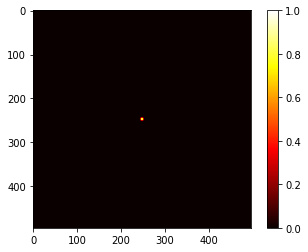

In [351]:
plt.imshow(smooth_xy, cmap = "hot") ; plt.colorbar();

In [352]:
# 2 Convolutions 1D with smooth x and smooth y after
Ix_smooth = convolve2d(convolve2d(Ix, smooth_x, mode = "same"), smooth_y, mode = "same");
Iy_smooth = convolve2d(convolve2d(Iy, smooth_x, mode = "same"), smooth_y, mode = "same")

# Auto-correlation matrix

In [368]:
A = np.array([[Ix_smooth**2, Ix_smooth * Iy_smooth], [Ix_smooth * Iy_smooth, Iy_smooth**2]])
A.shape

(2, 2, 495, 495)

In [365]:
B = A[:, :, 100, 100];
B

array([[  668.25931805,   990.78582231],
       [  990.78582231,  1468.97546981]])

In [366]:
Mc = np.linalg.det(B) - 0.04 * np.trace(B) ** 2
Mc

-182710.90153753033

In [367]:
np.linalg.eigvals(B)

array([    0.        ,  2137.23478786])

In [357]:
C = A[:, :, 137, 222];
print (C)
np.linalg.eigvals(C)

[[ 119217.81327569  273757.28693986]
 [ 273757.28693986  628622.93891744]]


array([      0.        ,  747840.75219313])

In [358]:
np.linalg.det(A.T)[100, 100]

0.0

In [359]:
np.linalg.eigvals(A).shape

(2, 2, 495)

In [360]:
D = A.copy()

In [361]:
Corner_response_eigs = np.linalg.eigvals(D.T)
Corner_response_Mc = np.linalg.det(D.T) - kappa * np.trace(D.T, axis1 = 2, axis2 = 3)**2
print ("Shape of corner response : {}".format(Corner_response_Mc.shape))

Shape of corner response : (495, 495)


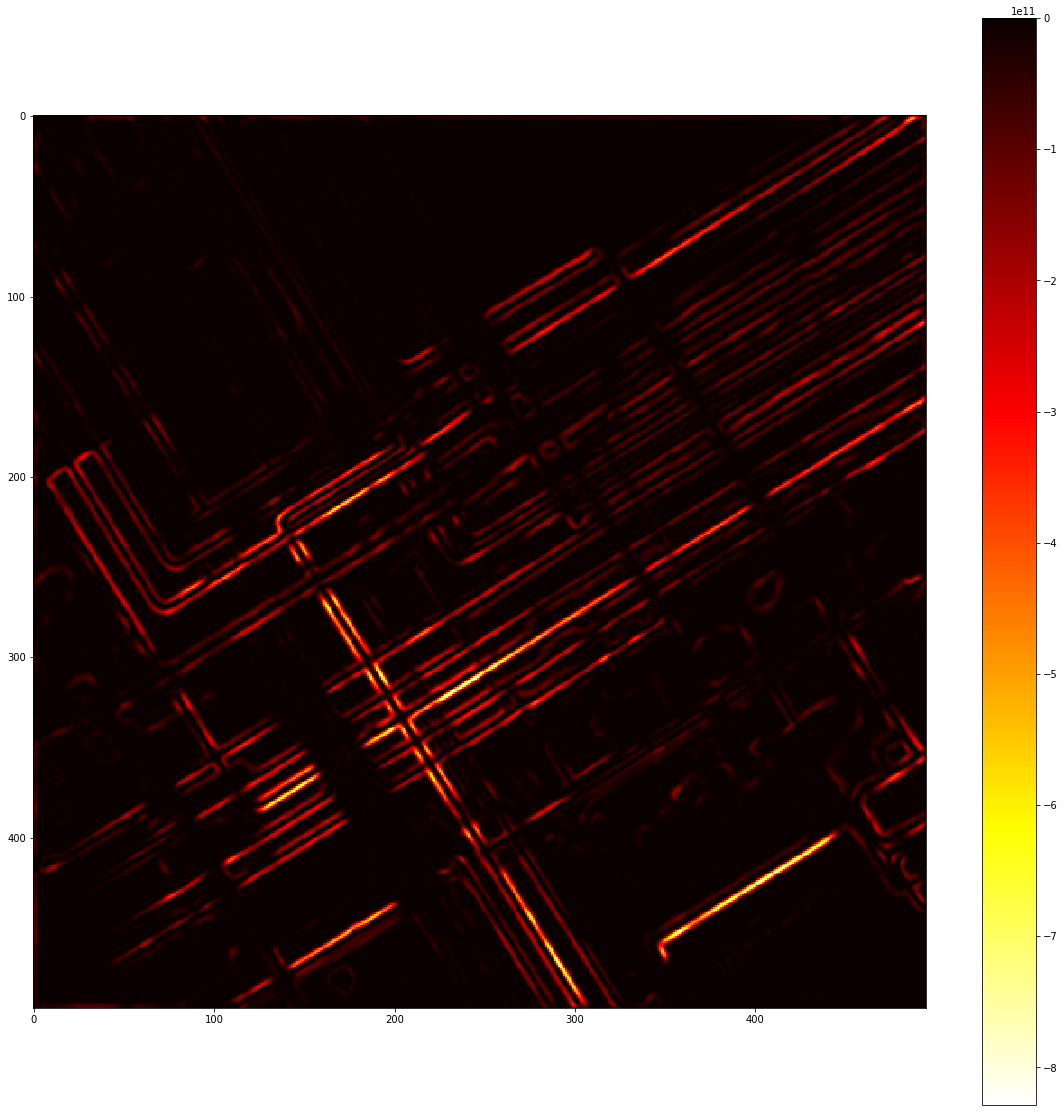

In [362]:
plt.figure(figsize = (20, 20));
plt.imshow(Corner_response_Mc.T, cmap = "hot_r") ; plt.colorbar();

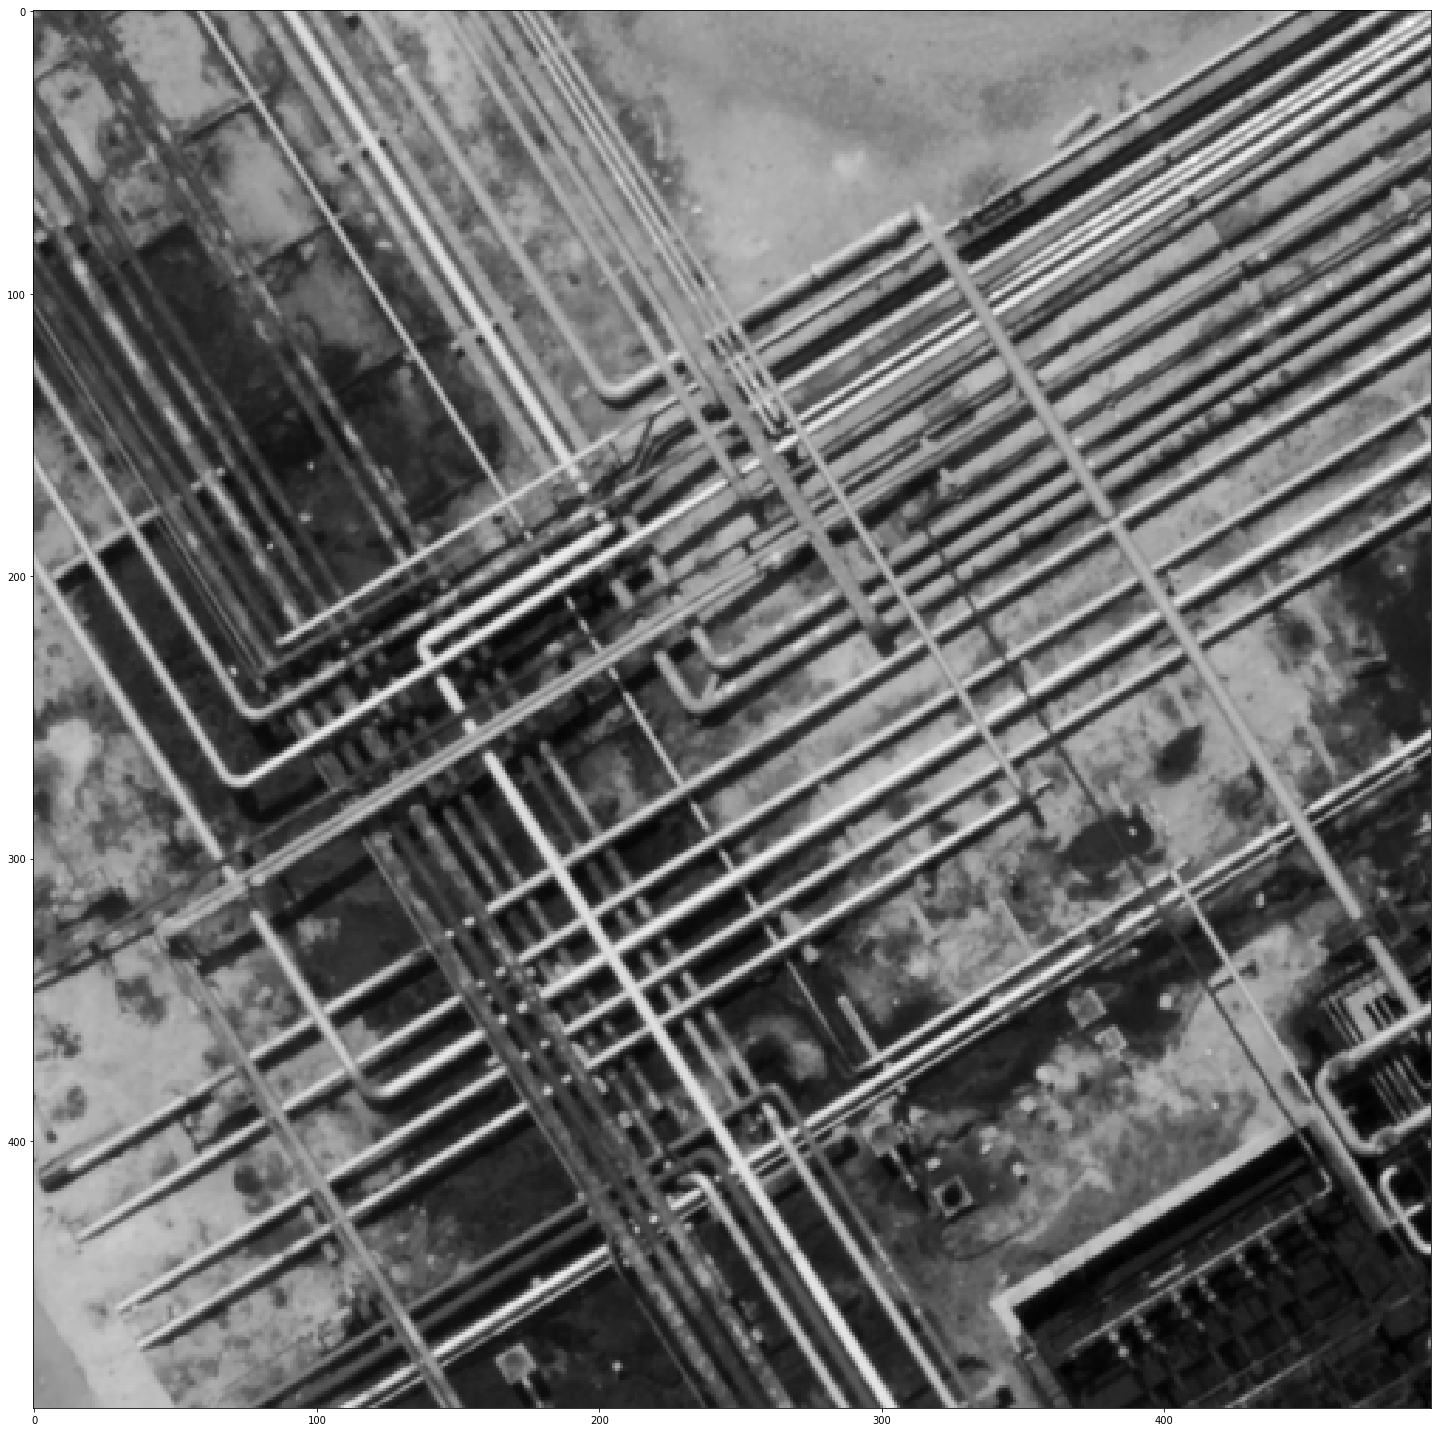

In [363]:
plt.figure(figsize = (20, 20));
imshow(bouc);